# Problem
*  Determine or test the influence of different variables on the emission of CO2.
*What are the most influencing features that affect the CO2 emission the most?
*Will there be any difference in the CO2 emissions when Fuel Consumption for City and Highway are considered separately and when their weighted variable interaction is considered?

#Importing Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project/CO2 Emissions_Canada.csv")

Model
*    4WD/4X4 = Four-wheel drive
*    AWD = All-wheel drive
*FFV = Flexible-fuel vehicle
*SWB = Short wheelbase
*LWB = Long wheelbase
*EWB = Extended wheelbase

Transmission
*    A = Automatic
*AM = Automated manual
*AS = Automatic with select shift
*AV = Continuously variable
*M = Manual
*3 - 10 = Number of gears

Fuel type
* X = Regular gasoline
*Z = Premium gasoline
*D = Diesel
*E = Ethanol (E85)
*N = Natural gas

#Understanding the data

In [ ]:
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [ ]:
df.shape

(7385, 12)

In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

The columns of this dataset are

*    Model
*    Make
*Engine Size(L)
*Cylinders
*Fuel Type
*Fuel Consumption City (L/100 km)
*Fuel Consumption Hwy (L/100 km)
*Fuel Consumption Comb (mpg and L/100 km)
*Vehicle class
*Transmission

In [ ]:
df.duplicated().sum()

1103

There are 1103 duplicate rows in the data frame

In [ ]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [ ]:
len(np.unique(df["Model"]))

2053

There are 2053 unique models in the dataset so it is not so useful.

In [ ]:
np.unique(df["Transmission"])

array(['A10', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'AM5', 'AM6', 'AM7',
       'AM8', 'AM9', 'AS10', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9',
       'AV', 'AV10', 'AV6', 'AV7', 'AV8', 'M5', 'M6', 'M7'], dtype=object)

In [ ]:
np.unique(df["Vehicle Class"])

array(['COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'MINIVAN',
       'PICKUP TRUCK - SMALL', 'PICKUP TRUCK - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE',
       'STATION WAGON - SMALL', 'SUBCOMPACT', 'SUV - SMALL',
       'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO', 'VAN - PASSENGER'],
      dtype=object)

In [ ]:
np.unique(df["Fuel Type"])

array(['D', 'E', 'N', 'X', 'Z'], dtype=object)

In [ ]:
np.unique(df["Make"])


array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUGATTI', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE',
       'FIAT', 'FORD', 'GENESIS', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI',
       'JAGUAR', 'JEEP', 'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS',
       'LINCOLN', 'MASERATI', 'MAZDA', 'MERCEDES-BENZ', 'MINI',
       'MITSUBISHI', 'NISSAN', 'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION',
       'SMART', 'SRT', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'],
      dtype=object)

There are 42 makers

In [ ]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

No null values are present in the dataset.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0




*   Engine size is under 3.7 for 75% cars and 50% car engines lie in 2 - 3.7 L.
*   Average no. of cylinders is 6.
*   Average fuel consumption (city) is around 12.5 L per 100 km and on (Hwy) is around 9 L per 100 KM  which is lower than cities.
*   Average fuel consumtion for combined (55% city and 45% highway) is around 11 L per 100 KM.
*   Combined average is around 27 (miles per gallon ).
*    Average carbon emission by cars is 250.58 g/km.
###Limitation in data
Since data is observed for 7 years during which, technology can change rapidly which can influence our interpretation and prediction.



### Creating Copy Of the Dataframe
so that any changes in df are not reflected in original dataframe

In [ ]:
df1 = df.copy(deep=True)

In [ ]:
# renaming the columns to avoid gaps in name
df1.rename(columns={'Vehicle Class':'Vehicle_Class' ,
                    'Engine Size(L)' : 'Eng_Size' ,
                    'Fuel Type':'Fuel_Type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
                    'CO2 Emissions(g/km)': 'co2'
                    },
           inplace = True)

In [ ]:
df1.keys()

Index(['Make', 'Model', 'Vehicle_Class', 'Eng_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

## Manipuation on Data


In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df1

,Make,Model,Vehicle_Class,Eng_Size,Cylinders,Transmission,Fuel_Type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


4WD/4X4 = Four-wheel drive
AWD = All-wheel drive
FFV = Flexible-fuel vehicle
SWB = Short wheelbase
LWB = Long wheelbase
EWB = Extended wheelbase

In [ ]:
import re
def replace_val(value) :
  if re.search(r'AWD' , value):
    return "AWD"
  elif re.search(r'4WD' , value):
    return "4WD"
  elif re.search(r'FFV' , value) :
    return  "FFV"
  elif re.search(r'SWB' , value) :
    return "SWB"
  elif re.search(r'LWB' , value) :
    return "LWB"
  elif re.search(r'EWB' , value) :
    return "EWB"
  else :
    return value
df1["Model"] = df1['Model'].apply(replace_val)

In [ ]:
len(np.unique(df["Model"]))

2053

In [ ]:
df1.shape

(6282, 12)

In [ ]:
# Categorising in A, AM, AS, AV and M
category_map = {'A10' : 'A',
                'A4' : 'A',
                'A5': 'A',
                'A6': 'A',
                'A7': 'A',
                'A8': 'A',
                'A9': 'A',
                'AM5':'AM',
                'AM6':'AM',
                'AM7':'AM',
                'AM8':'AM',
                'AM9':'AM',
                'AS10':'AS',
                'AS4':'AS',
                'AS5':'AS',
                'AS6':'AS',
                'AS7':'AS',
                'AS8':'AS',
                'AS9':'AS',
                'AV' :'AV',
                'AV10':'AV',
                'AV6':'AV',
                'AV7':'AV',
                'AV8':'AV',
                'M5':'M',
                'M6':'M',
                'M7':'M'}
df1['Transmission'] = df1['Transmission'].replace(category_map)

In [ ]:
df1.shape

(6282, 12)

In [ ]:
df1.dtypes

Make                  object
Model                 object
Vehicle_Class         object
Eng_Size             float64
Cylinders              int64
Transmission          object
Fuel_Type             object
fuel_cons_city       float64
fuel_cons_hwy        float64
fuel_cons_comb       float64
mpgfuel_cons_comb      int64
co2                    int64
dtype: object

Changing the data type of CO2 and MPGfuel from int64 to float64

In [ ]:
df1['mpgfuel_cons_comb'] = df1['mpgfuel_cons_comb'].astype('float64')
df1['co2'] = df1['co2'].astype('float64')


In [ ]:
df1.dtypes

Make                  object
Model                 object
Vehicle_Class         object
Eng_Size             float64
Cylinders              int64
Transmission          object
Fuel_Type             object
fuel_cons_city       float64
fuel_cons_hwy        float64
fuel_cons_comb       float64
mpgfuel_cons_comb    float64
co2                  float64
dtype: object

# Exploratory Data Analysis
## Using Matplotlib and Seaborn for visualisation

### Effect of Features on CO2 Emission

<Axes: xlabel='Cylinders', ylabel='co2'>

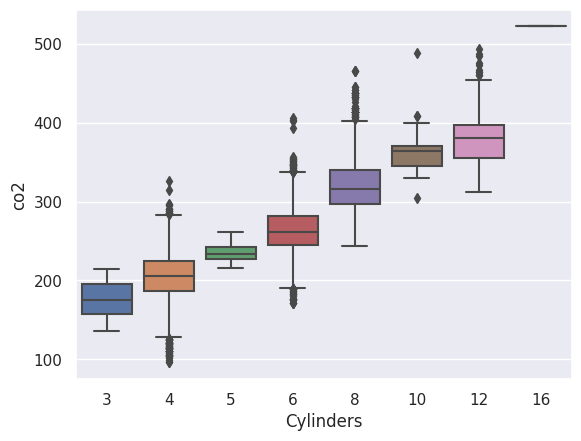

In [ ]:
# Car Cylinder vs CO2 Emission
sns.set(style = "darkgrid")
sns.boxplot(x = df1['Cylinders'] ,y= df1['co2'] )


##Interpretation

*   Vehicles having more cylinders tend to produce more co2.
*   No. of Cylinders in vehicles seems important variable in producing co2.
*   8 cylinder vehicles have outliers on upper side.


<Axes: xlabel='Fuel_Type', ylabel='co2'>

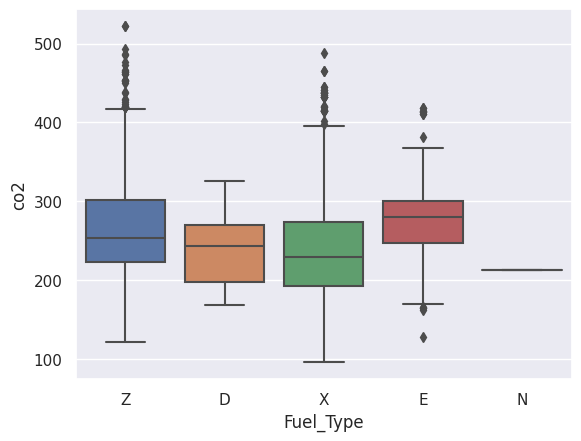

In [ ]:
# Fuel Type vs CO2
sns.set(style = "darkgrid")
sns.boxplot(x = df1['Fuel_Type'] ,y= df1['co2'] )

In [ ]:
# Vehicle Type vs Co2
sns.set(style = "darkgrid")
sns.boxplot(x = df1['Vehicle_Class'] ,y= df1['co2'] )
plt.xticks(rotation = 90)
plt.show()

#Interpretation
*   Van Passenger has higher co2 emission on an average.
*   Mid size and Two seater has higher co2 emission.

In [ ]:
# Car maker vs CO2
plt.figure(figsize=(12,6))
sns.set(style = "darkgrid" , )
sns.boxplot(x = df1['Make'] ,y= df1['co2'] )
plt.xticks(rotation = 90)
plt.show()

# Interpretation
*    Bugati is highest co2 emitter
*    Lamborghini also has significantly higher co2 emission than others
*    Smart is least co2 emitter

In [ ]:
np.unique(df1["Make"])

*    BUGATTI has highest 16 cylinders which is an outlier

In [ ]:
# Cylinders
sns.set(style = "darkgrid")
sns.histplot(x = df1['Cylinders']  )

In [ ]:
df1.Cylinders.value_counts()

In [ ]:
df1.Cylinders.value_counts(normalize = True)

*    About 43.75% cars have 4 cylinders followed by 6 Cylinders
*    

In [ ]:
# CO2 Plot
sns.set(style = "darkgrid")
f,(ax_box , ax_hist) = plt.subplots(2 , gridspec_kw= {"height_ratios" : (0.15,0.85)})
sns.boxplot(df1['co2'] ,orient = 'h' , ax = ax_box)
sns.histplot(x = df1['co2'] , ax = ax_hist, kde = False )

In [ ]:
# Fuel Consumptions
plt.hist(df1["fuel_cons_city"], color="green", label="Fuel Consumption in city", alpha=0.3)
plt.hist(df1["fuel_cons_hwy"], color="blue", label="Fuel Consumption in Highway", alpha=0.3)
plt.hist(df1["fuel_cons_comb"], color="red", label="Fuel Consumption in combination", alpha=0.3 )
plt.title("Comparison of Fuel Consumptions")
plt.xlabel("L/ 100 KM")
plt.legend()


*    Fuel consumption on Highways is higher.

In [ ]:
# Co2 vs Engine and Transmission
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)  # split plot area in 1row and 2 column , 1st plot
 # Engine
sns.scatterplot(x= df1['Eng_Size'] , y = df1['co2'])
plt.title('Engine size vs CO2')
plt.subplot(1,2,2)
# Transmission
sns.boxplot( x = df1['Transmission'] , y = df1['co2'])
plt.title('Transmission vs CO2')
plt.xticks(rotation = 45)

*    Engine size seems to have influence on the CO2 emission.Higher engine size have higher co2 emission.
*    Automatic transmission have higher co2 emission.


In [ ]:
sns.countplot(data = df1 , x = 'Transmission' , hue = 'Cylinders' , palette = 'Set1')
plt.xlabel('Transmission')
plt.ylabel('Count')

In [ ]:
# Fuel consumptions vs Co2 emission
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
# Fuel consumptions in City vs CO2
sns.scatterplot( x =df1['fuel_cons_city'] , y = df1['co2'] , hue = df1['Transmission'])
plt.title("Fuel consumption in city vs CO2")

# Fuel consumptions in City vs CO2
plt.subplot(2,2,2)
sns.scatterplot( x =df1['fuel_cons_hwy'] , y = df1['co2'], hue = df1['Transmission'])
plt.title("Fuel consumption in highway vs CO2")

#  Fuel consumption (Combined) vs CO2
plt.subplot(2,2,3)
sns.scatterplot( x =df1['fuel_cons_comb'] , y = df1['co2'], hue = df1['Transmission'])
plt.title("Fuel consumption combined vs CO2")
#  Fuel consumptin (mpg) vs CO2
plt.subplot(2,2,4)
sns.scatterplot( x =df1['mpgfuel_cons_comb'] , y = df1['co2'], hue = df1['Transmission'])
plt.title("Fuel consumption (mpg) vs CO2")

Obiviously more co2 emission occur if more fuel is consumed

## Which type of Fuel is consumed mostly ?


Text(0.5, 1.0, 'Fuel consumption in mpg')

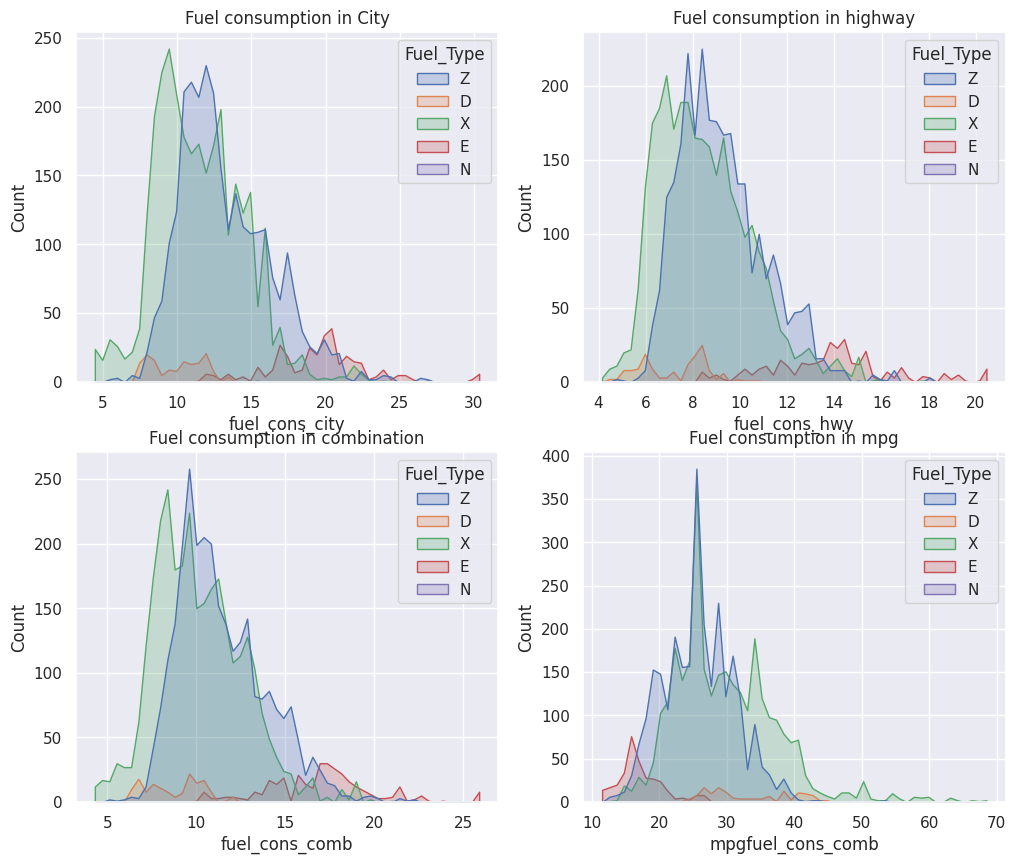

In [ ]:

plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
# Histogram of Consumption in city with fuel type

sns.histplot( x = df1['fuel_cons_city'] , hue = df1['Fuel_Type'] , element = 'poly')
plt.title("Fuel consumption in City")

plt.subplot(2,2,2)
sns.histplot( x = df1['fuel_cons_hwy'] , hue = df1['Fuel_Type'],element = 'poly')
plt.title("Fuel consumption in highway")

plt.subplot(2,2,3)
sns.histplot( x = df1['fuel_cons_comb'] , hue = df1['Fuel_Type'],element = 'poly')
plt.title("Fuel consumption in combination")

plt.subplot(2,2,4)
sns.histplot( x = df1['mpgfuel_cons_comb'] , hue = df1['Fuel_Type'],element = 'poly')
plt.title("Fuel consumption in mpg")

*     Fuel type X and Z are mostly used in cities and highways.

##Correlation in data

<ipython-input-123-510667b0132a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr() , annot = True)


<Axes: >

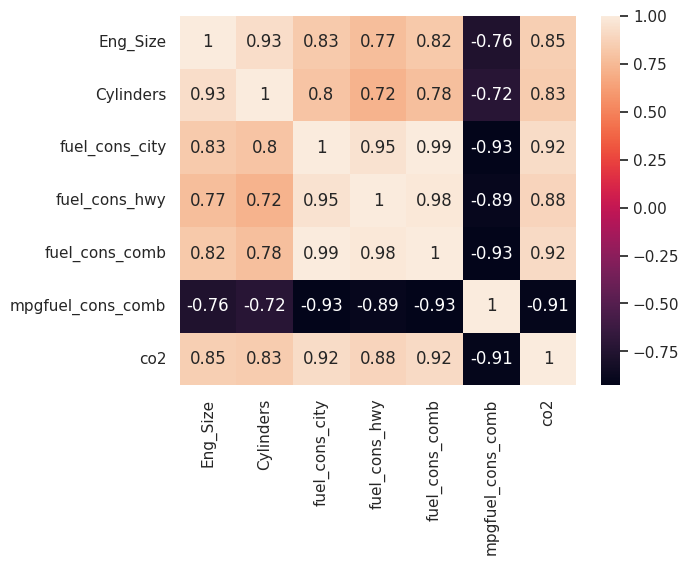

In [ ]:
sns.heatmap(df1.corr() , annot = True)

*   Variables are highly correlated.
*   We should use Combined fuel consumption on highway and city.


In [ ]:
#sns.pairplot( df1 , kind = 'Scatter' , hue = 'Fuel_Type')
#plt.show()

array([[<Axes: title={'center': 'Eng_Size'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'fuel_cons_city'}>],
       [<Axes: title={'center': 'fuel_cons_hwy'}>,
        <Axes: title={'center': 'fuel_cons_comb'}>,
        <Axes: title={'center': 'mpgfuel_cons_comb'}>],
       [<Axes: title={'center': 'co2'}>, <Axes: >, <Axes: >]],
      dtype=object)

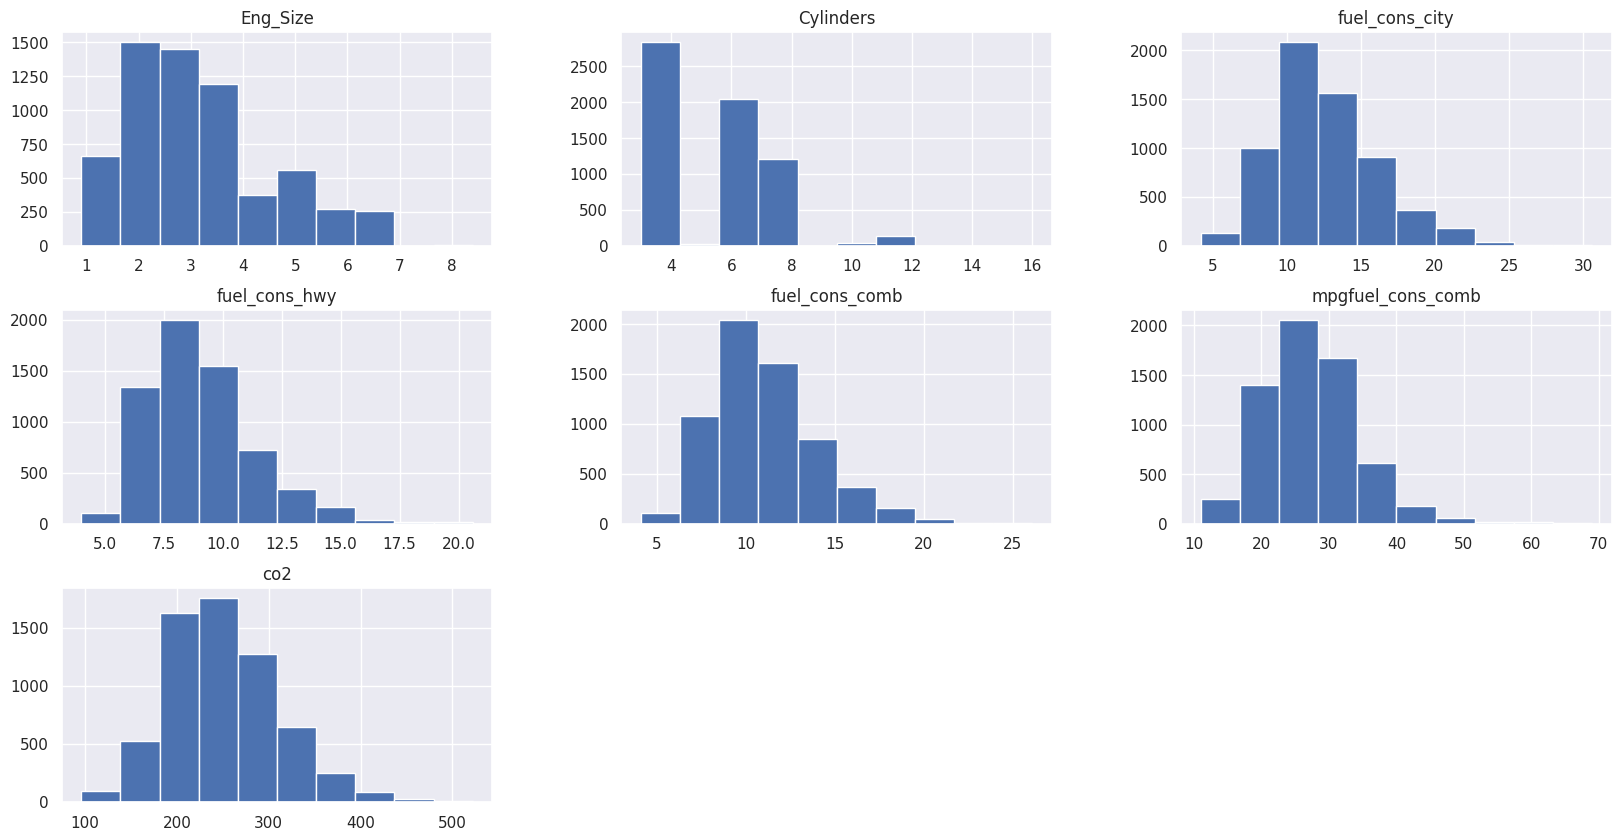

In [ ]:

df1.hist(figsize = (20,10))

#Outliers

In [ ]:
# count no. of rows in outlier
Q1 = df1['co2'].quantile(0.25)
Q3 = df1['co2'].quantile(0.75)
# Bounds
U_bound = Q3 + (Q3 - Q1)*1.5
L_bound = Q1 - (Q3 - Q1)*1.5
outlier_df = df1[(df1['co2'] < L_bound) | (df1['co2'] > U_bound) ]


In [ ]:
outlier_df

,Make,Model,Vehicle_Class,Eng_Size,Cylinders,Transmission,Fuel_Type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS,Z,22.3,14.9,19.0,15.0,437.0
223,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,4.8,8,A,X,21.1,14.2,18.0,16.0,414.0
224,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,A,X,21.9,15.0,18.8,15.0,432.0
225,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,A,E,30.0,20.4,25.7,11.0,411.0
226,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,4.8,8,A,X,21.3,14.3,18.2,16.0,419.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM,Z,26.8,16.6,22.2,13.0,522.0
6010,JEEP,Grand Cherokee 4X4 Trackhawk,SUV - STANDARD,6.2,8,A,Z,20.9,13.8,17.7,16.0,413.0
6045,LAMBORGHINI,Aventador Coupe,TWO-SEATER,6.5,12,AM,Z,26.3,15.6,21.5,13.0,487.0
6046,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM,Z,26.6,15.8,21.7,13.0,493.0


# Model Fitting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                   PolynomialFeatures)

##Simple Linear Regression

###Model 1

In [ ]:
slr = LinearRegression()

*     Cylinder (residual mean near 0 and qq almost straight)
*     Combined Fuel Consumption (residual near 0 , plot like u , qqplot deviation)
*     Hwy (residual mean near 0 , plot shape x^2 and qq les deviated)

In [ ]:
# First fitting the Simple Linear regression model Engine size as regressor (Cylinder)
import math
y = df1['co2']
x1 = df1[['Cylinders']]
from scipy.stats import boxcox
# taking log transformation
x1=np.log(x1)
s = StandardScaler()
x1 = s.fit_transform(x1)
df1.shape

(6282, 12)

In [ ]:

# Splitting the data into Train and Test parts
x1_train , x1_test , y1_train , y1_test = train_test_split(x1, y, test_size = 0.3 , random_state= 20 )


In [ ]:


slr.fit(x1_train, y1_train)

y1_pred = slr.predict(x1_test)

In [ ]:
r2 = r2_score(y1_pred , y1_test)
print(f"R2 score is {r2_score(y1_pred , y1_test)}")
print("Adjusted R2 score is : %02f", 1-((1-r2)*(6282-1)/(6282 - 2 - 1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y1_pred - y1_test) ** 2))

R2 score is 0.593329266144011
Adjusted R2 score is : %02f 0.5931997325450762
Residual sum of squares (MSE): 1020.83


*    Accuracy is about 59.33%
*    MSE 1020.83

####Residual Plot

-9.618263277789667e-15
-0.47331976176736945


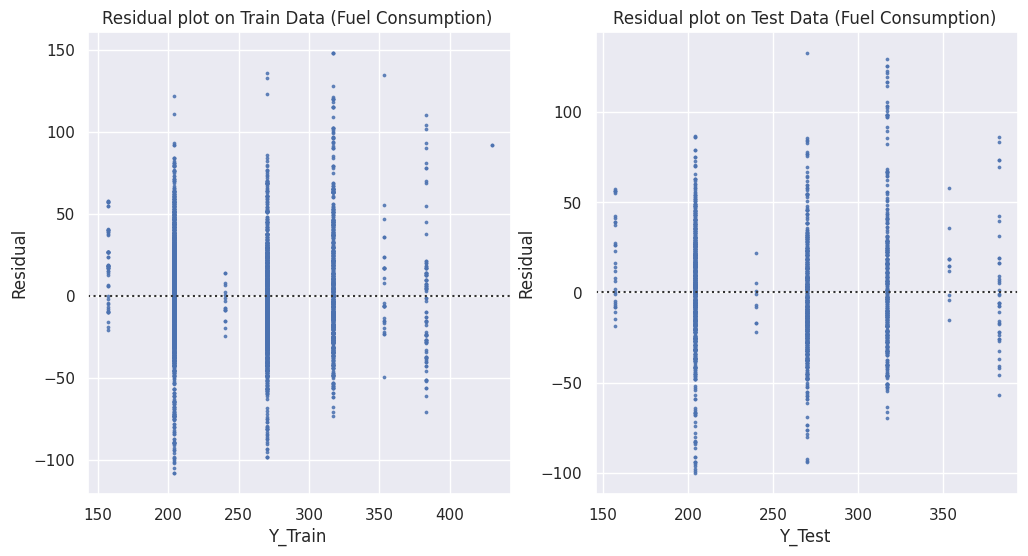

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# Residul plot of Train data
residual1_train = y1_train - slr.predict(x1_train)
sns.residplot(x = slr.predict(x1_train) , y = residual1_train , scatter_kws={'s':3})
plt.xlabel('Y_Train ')
plt.ylabel('Residual')
plt.title('Residual plot on Train Data (Fuel Consumption) ')
print(np.mean(residual1_train))

# Residual plot of Test Data
plt.subplot(1,2,2)
residual1_test = y1_test - y1_pred
sns.residplot(x = y1_pred , y = residual1_test , scatter_kws={'s':3})
plt.xlabel('Y_Test ')
plt.ylabel('Residual')
plt.title('Residual plot on Test Data (Fuel Consumption) ')
print(np.mean(residual1_test))

Text(0.5, 1.0, 'Train')

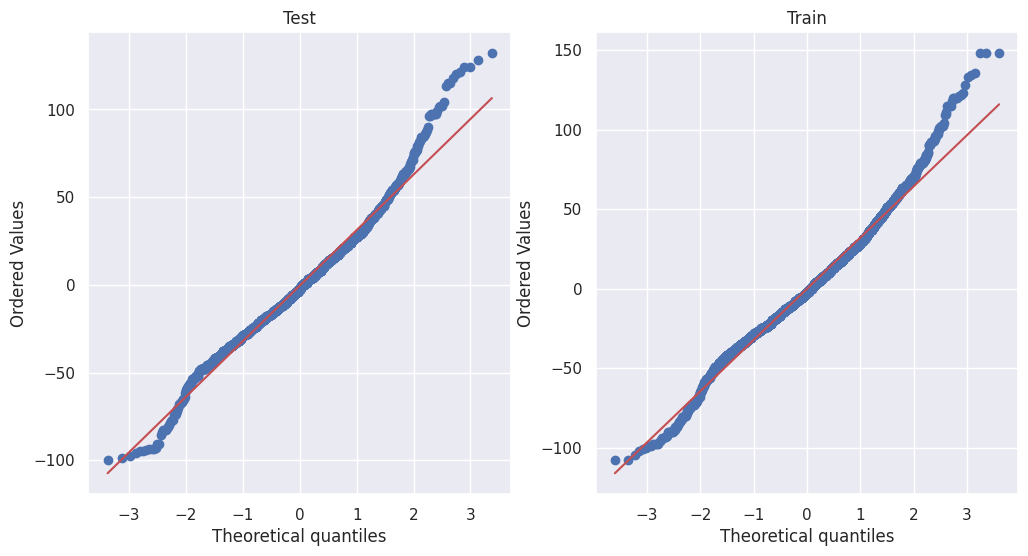

In [ ]:
plt.figure(figsize=(12,6))
# Q-Q plot to check normality assumption
from scipy.stats import probplot
plt.subplot(1,2,1)
probplot(residual1_test , dist = 'norm' , plot = plt)
plt.title("Test")
plt.subplot(1,2,2)
probplot(residual1_train , dist = 'norm' , plot = plt)
plt.title("Train")

###Model 2

In [ ]:
# First fitting the Simple Linear regression model Engine size as regressor
y = df1['co2']
x2 = df1[["Eng_Size"]]
x2 = np.log(x2)
#x2 = np.sqrt(x2)
#x2 = x2*x2

In [ ]:
# Splitting the data into Train and Test parts
x2_train , x2_test , y2_train , y2_test = train_test_split(x2, y, test_size = 0.3 , random_state= 20 )


In [ ]:
# Standardising the variable
s = StandardScaler()
x2_train_s = s.fit_transform(x2_train)

In [ ]:
slr.fit(x2_train_s, y2_train)
x2_test_s = s.transform(x2_test)
y2_pred = slr.predict(x2_test_s)

In [ ]:
print(f"R2 score is {r2_score(y2_pred , y2_test)}")
print("Residual sum of squares (MSE): %.2f" % np.mean((y2_pred - y2_test) ** 2))

R2 score is 0.6321743795127482
Residual sum of squares (MSE): 957.47


R Square = 0.6396

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# Residul plot of Train data
residual2_train = y2_train - slr.predict(x2_train)
sns.residplot(x = slr.predict(x2_train) , y = residual2_train , scatter_kws={'s':3})
plt.xlabel('Y_Train ')
plt.ylabel('Residual')
plt.title('Residual plot on Train Data (Eng_Size)) ')
print(np.mean(residual2_train))

# Residual plot of Test Data
plt.subplot(1,2,2)
residual2_test = y2_test - y2_pred
sns.residplot(x = y2_pred , y = residual2_test , scatter_kws={'s':3})
plt.xlabel('Y_Test ')
plt.ylabel('Residual')
plt.title('Residual plot on Test Data (Eng_Size) ')
print(np.mean(residual2_test))

In [ ]:
plt.figure(figsize=(12,6))
# Q-Q plot to check normality assumption
from scipy.stats import probplot
plt.subplot(1,2,1)
probplot(residual2_test , dist = 'norm' , plot = plt)
plt.title("Test")
plt.subplot(1,2,2)
probplot(residual2_train , dist = 'norm' , plot = plt)
plt.title("Train")

*    Mpg , fuel combined -
      checked transformations (X , log(x) , sqrt(x) , 1/x) and rejected all. Assumption of Residual plot and normality not satisfied.
*   Cylinder with (log(x)), Eng-Size , fuel consumption highway simple X is to be used.

##Multiple Linear Regression

###Model 1

In [ ]:
mlr = LinearRegression()
y = df1['co2']
#transforming cyliders using log
df1['Cylinders_transformed'] = np.log(df1['Cylinders'])
x_1= df1[['Eng_Size' ,"Cylinders_transformed" , 'fuel_cons_hwy' ]]
#standardising X values
s = StandardScaler()
x_1 = s.fit_transform(x_1)

In [ ]:
# Spltting the data
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x_1,y, test_size = 0.3 , random_state= 20 )

# Fitting the data
mlr.fit(x_train1, y_train1)
# predicted values for test data
y_pred1 = mlr.predict(x_test1)

In [ ]:
# R2 score for test data
print(f"R2 score is {r2_score(y_pred1 , y_test1)}")
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred1 - y_test1) ** 2))
# R2 score for train data
print(f"R2 score is {r2_score(mlr.predict(x_train1) , y_train1)}")
print("Residual sum of squares (MSE): %.2f" % np.mean((mlr.predict(x_train1) - y_train1) ** 2))

*    Accuracy about 86.1% (On Test Data)
*    Accuracy about 86.30% (on Train Data)

####Residual Plot

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
# Residul plot of Train data
residual_train_1 = y_train1 - mlr.predict(x_train1)
sns.residplot(x = mlr.predict(x_train1) , y = residual_train_1 , scatter_kws={'s':3})
plt.xlabel('Y_Train 1')
plt.ylabel('Residual')
plt.title('Residual plot on Train Data 1')
print(np.mean(residual_train_1))

# Residual plot of Test Data
plt.subplot(1,2,2)
residual_test_1 = y_test1 - y_pred1
sns.residplot(x = y_pred1 , y = residual_test_1 , scatter_kws={'s':3})
plt.xlabel('Y_Test 1')
plt.ylabel('Residual')
plt.title('Residual plot on Test Data 1')
print(np.mean(residual_test_1))

There is some dependency of residual variation on predicted value. Here Outward Open Funnel is created which shows that variation inc. w.r.t predicted value.

In [ ]:
plt.figure(figsize=(12,6))
# Q-Q plot to check normality assumption
from scipy.stats import probplot
plt.subplot(1,2,1)
probplot(residual_test_1, dist = 'norm' , plot = plt)
plt.title("Test")
plt.subplot(1,2,2)
probplot(residual_train_1 , dist = 'norm' , plot = plt)
plt.title("Train")

### Now including Dummy variables

In [ ]:
# creating Dummy Variables
df_dummies = pd.get_dummies(df1 , columns = ['Transmission' , 'Fuel_Type'] , drop_first = True)
print(df_dummies)

In [ ]:
# Regression with dummies
mlr = LinearRegression()
y_2 = df_dummies['co2']
# droping unwanted variables and working with only (Engine size , Cylinders_transformed , Fuel Consumption Combined , Transmission , Fuel Type)
#x_2 = df_dummies.drop(columns = ['co2'], axis = 1)
x_2 = df_dummies.drop(columns = ['co2' ,'Make','Cylinders','Model','Vehicle_Class','fuel_cons_city', 'fuel_cons_comb', 'mpgfuel_cons_comb'], axis = 1)


In [ ]:
x_2

###Model 2

In [ ]:
# Splitting the data
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(x_2, y_2, test_size = 0.3 , random_state= 20 )
# Fitting the data
mlr.fit(x_train2, y_train2)
# predicted values
y_pred2 = mlr.predict(x_test2)

In [ ]:
# R2 score of Train data
print(f"Train R2 score is {r2_score(mlr.predict(x_train2) , y_train2)}")
print("Residual sum of squares (MSE): %.2f" % np.mean((mlr.predict(x_train2) - y_train2) ** 2))

# R2 score of Test data
print(f"atest R2 score is {r2_score(y_pred2 , y_test2)}")
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred2 - y_test2) ** 2))

In [ ]:
mlr.coef_

R2 score improved from 86.1% to 99.05 %

####Residual plot

In [ ]:
plt.figure(figsize=(12,6))
# Residual plot with predicted values test data
plt.subplot(1,2,1)
residual_test_2 = y_test2 - y_pred2
sns.residplot(x = y_pred2 , y = residual_test_2 , scatter_kws = {'s':3})
plt.xlabel('Y pred Test 2')
plt.ylabel('Residual')
plt.title('Residual plot Test 2')
print(np.mean(residual_test_2))

# Residual plot with predicted values train data
plt.subplot(1,2,2)
residual_train_2 = y_train2 - mlr.predict(x_train2)
sns.residplot(x = mlr.predict(x_train2) , y = residual_train_2 , scatter_kws = {'s':3})
plt.xlabel('Y pred Train 2')
plt.ylabel('Residual')
plt.title('Residual plot Train2 ')
print(np.mean(residual_train_2))

####Q-Q Plot

In [ ]:
plt.figure(figsize=(12,6))
# Q-Q plot to check normality assumption
from scipy.stats import probplot
plt.subplot(1,2,1)
probplot(residual_test_2 , dist = 'norm' , plot = plt)
plt.title("Test")
plt.subplot(1,2,2)
probplot(residual_train_2 , dist = 'norm' , plot = plt)
plt.title("Train")

We can observe that there is great deviation in qq plot from the line which indicates that Normality assumption is violated.

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.kdeplot( residual_train_2, fill = True)
plt.xlabel("Residual of Train Data")
plt.title("Train")

plt.subplot(1,2,2)
sns.kdeplot( residual_test_2, fill = True)
plt.xlabel("Residual of Test Data")
plt.title("Test")

Residuals are left skewed.

###Removing Infuential Observations by cooks distance

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
model = sm.OLS(y_2 , x_2).fit()

In [ ]:
influence = OLSInfluence(model)
cooks_distance = influence.cooks_distance
cook = cooks_distance[0]
df2 = df1.copy(deep = True)
df2['Cook_Distance'] = cook
df2

In [ ]:
threshold = 4/(6282)
influential_indices = df2[df2['Cook_Distance'] > threshold].index.tolist()
len(influential_indices)

In [ ]:
df2 = df2.drop(influential_indices)
#df_3 = df2.drop(df2['Fuel_Type'] == '')

###Model 3 (After removing influential observations)

In [ ]:
dfdroped_dummies = pd.get_dummies(df2 , columns = ['Transmission' , 'Fuel_Type'] , drop_first = True)
print(dfdroped_dummies)

In [ ]:
mlr = LinearRegression()
y__2 = dfdroped_dummies['co2']
# droping unwanted variables and working with only (Engine size , Cylinders_transformed , Fuel Consumption Combined , Transmission , Fuel Type)
#x_2 = df_dummies.drop(columns = ['co2'], axis = 1)
x__2 = dfdroped_dummies.drop(columns = ['co2' ,'Make','Cylinders','Model','Vehicle_Class','Cook_Distance','fuel_cons_city', 'fuel_cons_comb', 'mpgfuel_cons_comb'], axis = 1)


In [ ]:
x__2

In [ ]:
# Splitting the data
x_train3 , x_test3 , y_train3 , y_test3 = train_test_split(x__2, y__2, test_size = 0.3 , random_state= 20 )
# Fitting the data
mlr.fit(x_train3, y_train3)

# predicted values
y_pred3 = mlr.predict(x_test3)
x_train3.shape()

In [ ]:
print(f"Train R2 score is {r2_score(mlr.predict(x_train3) , y_train3)}")
print(f"Train adjusted R2 score {1 - ((5855-1)/(5855-11))*(1-r2_score(mlr.predict(x_train3) , y_train3))}")
print("Residual sum of squares (MSE): %.2f" % np.mean((mlr.predict(x_train3) - y_train3) ** 2))

# R2 score of Test data
print(f"atest R2 score is {r2_score(y_pred3 , y_test3)}")
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred3 - y_test3) ** 2))

#### Residual plot


In [ ]:
plt.figure(figsize=(12,6))
# Residual plot with predicted values test data
plt.subplot(1,2,1)
residual_test_3 = y_test3 - y_pred3
sns.residplot(x = y_pred3 , y = residual_test_3 , scatter_kws = {'s':3})
plt.xlabel('Y pred Test 3')
plt.ylabel('Residual')
plt.title('Residual plot Test 3')
print(np.mean(residual_test_3))

# Residual plot with predicted values train data
plt.subplot(1,2,2)
residual_train_3 = y_train3 - mlr.predict(x_train3)
sns.residplot(x = mlr.predict(x_train3) , y = residual_train_3 , scatter_kws = {'s':3})
plt.xlabel('Y pred Train 3')
plt.ylabel('Residual')
plt.title('Residual plot Train3 ')
print(np.mean(residual_train_3))

####Q-Q Plot

In [ ]:
plt.figure(figsize=(12,6))
# Q-Q plot to check normality assumption
from scipy.stats import probplot
plt.subplot(1,2,1)
probplot(residual_test_3 , dist = 'norm' , plot = plt)
plt.title("Test")
plt.subplot(1,2,2)
probplot(residual_train_3 , dist = 'norm' , plot = plt)
plt.title("Train")

####Residual Distribution

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.kdeplot( residual_train_3, fill = True)
plt.xlabel("Residual of Train Data")
plt.title("Train")

plt.subplot(1,2,2)
sns.kdeplot( residual_test_3, fill = True)
plt.xlabel("Residual of Test Data")
plt.title("Test")

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#x = x.drop(['Eng_Size'] , axis = 1)
#vif = [variance_inflation_factor(x.values , i) for i in range(x.shape[1])]
#print(vif)

In [ ]:
vif = pd.DataFrame()
vif["Variable"] = x__2.columns
vif["VIF"] = [variance_inflation_factor(x__2.values, i) for i in range(x__2.shape[1])]

print(vif)

In [ ]:
mlr = LinearRegression()
dfdroped_dummies2 = dfdroped_dummies.copy(deep =True)
dfdroped_dummies2['Eng_transf'] = np.log(dfdroped_dummies2['Eng_Size'])
y__3 = dfdroped_dummies2['co2']
# droping unwanted variables and working with only (Engine size , Fuel Consumption Highway , Transmission , Fuel Type)
#x_2 = df_dummies.drop(columns = ['co2'], axis = 1)
x__3 = dfdroped_dummies2.drop(columns = ['co2' ,'Make','Cylinders','Eng_Size','Cylinders_transformed','Model','Vehicle_Class','Cook_Distance','fuel_cons_city', 'fuel_cons_comb', 'mpgfuel_cons_comb'], axis = 1)
# Splitting the data
x_train4 , x_test4 , y_train4 , y_test4 = train_test_split(x__3, y__3, test_size = 0.3 , random_state= 20 )
# Fitting the data
mlr.fit(x_train4, y_train4)

# predicted values
y_pred4 = mlr.predict(x_test4)



print(f"Train R2 score is {r2_score(mlr.predict(x_train4) , y_train4)}")
print("Residual sum of squares (MSE): %.2f" % np.mean((mlr.predict(x_train4) - y_train4) ** 2))

# R2 score of Test data
print(f"test R2 score is {r2_score(y_pred4 , y_test4)}")
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred4 - y_test4) ** 2))


In [ ]:
vif = pd.DataFrame()
vif["Variable"] = x__3.columns
vif["VIF"] = [variance_inflation_factor(x__3.values, i) for i in range(x__3.shape[1])]

print(vif)